Basic Linear regression(torch.nn)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

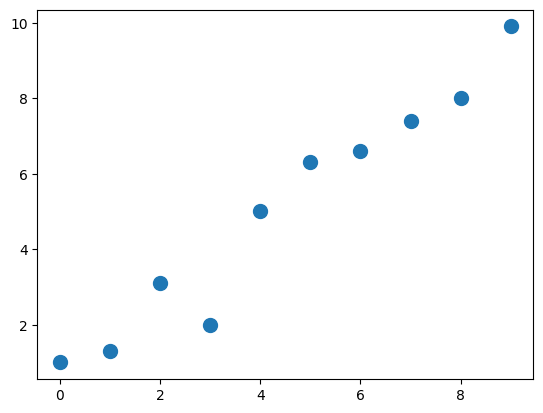

In [8]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.9], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)

In [9]:
from torch.utils.data import TensorDataset, DataLoader
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [10]:
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
    return xb @ weight.t() + bias

def loss_fn(input, target):
    return (input-target).pow(2).mean()

In [ ]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}')

Epoch [0/200], Loss: 0.2931283712387085
Epoch [10/200], Loss: 5.356737528927624e-05
Epoch [20/200], Loss: 2.264378070831299
Epoch [30/200], Loss: 0.3258677124977112
Epoch [40/200], Loss: 2.264378070831299
Epoch [50/200], Loss: 0.17818135023117065
Epoch [60/200], Loss: 0.7122480273246765
Epoch [70/200], Loss: 0.14665348827838898
Epoch [80/200], Loss: 0.7122480273246765
Epoch [90/200], Loss: 0.028329595923423767
Epoch [100/200], Loss: 0.2699647545814514
Epoch [110/200], Loss: 0.3258677124977112
Epoch [120/200], Loss: 0.2699647545814514
Epoch [130/200], Loss: 0.06427130848169327
Epoch [140/200], Loss: 0.2699647545814514
Epoch [150/200], Loss: 0.17818135023117065
Epoch [160/200], Loss: 5.356737528927624e-05
Epoch [170/200], Loss: 0.14665348827838898
Epoch [180/200], Loss: 2.264378070831299
Epoch [190/200], Loss: 0.06427130848169327


In [12]:
print('Final Parameters:', weight.item(), bias.item())

Final Parameters: 2.8022940158843994 4.968235492706299


In [15]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. generate predictions
        pred = model(x_batch)[:, 0]
        # 2. calculate loss
        loss = loss_fn(pred, y_batch)
        # 3. Compute gradients
        loss.backward()
        # 4. Update parameters using gradients
        optimizer.step()
        # 5. Reset the gradients to zero
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}')

Epoch [0/200], Loss: 4.715128421783447
Epoch [10/200], Loss: 3.5044405460357666
Epoch [20/200], Loss: 2.6465933322906494
Epoch [30/200], Loss: 31.25082015991211
Epoch [40/200], Loss: 0.020568333566188812
Epoch [50/200], Loss: 14.973441123962402
Epoch [60/200], Loss: 10.470181465148926
Epoch [70/200], Loss: 7.381736755371094
Epoch [80/200], Loss: 5.2554402351379395
Epoch [90/200], Loss: 0.04087160527706146
Epoch [100/200], Loss: 0.7683887481689453
Epoch [110/200], Loss: 0.4941527843475342
Epoch [120/200], Loss: 0.26383674144744873
Epoch [130/200], Loss: 1.1712663173675537
Epoch [140/200], Loss: 1.9858511686325073
Epoch [150/200], Loss: 0.3631846308708191
Epoch [160/200], Loss: 0.07245238870382309
Epoch [170/200], Loss: 0.010089443996548653
Epoch [180/200], Loss: 0.4074280261993408
Epoch [190/200], Loss: 0.03550364449620247


In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

In [19]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [20]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
        
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

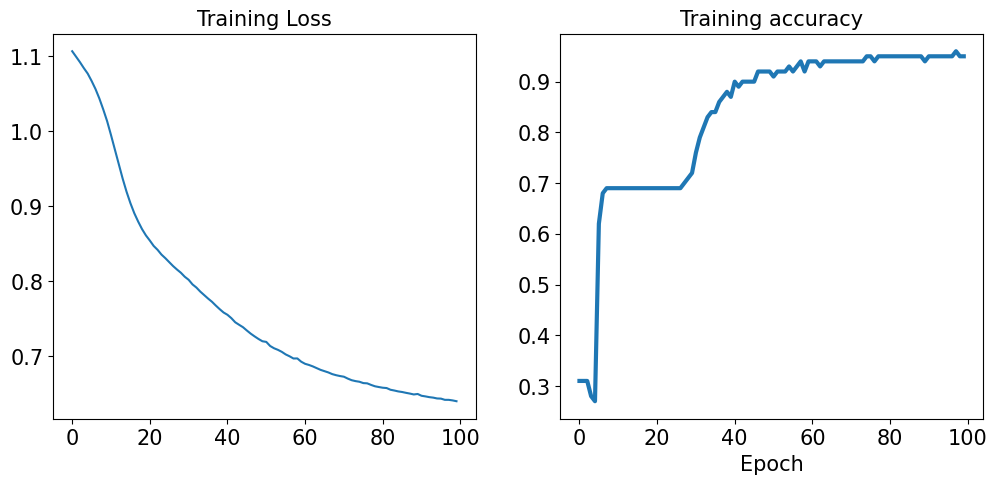

In [23]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist)
ax.set_title('Training Loss', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

In [30]:
torch.argmax(torch.arange(10).reshape((5, 2)), dim=1)

tensor([1, 1, 1, 1, 1])